**PART 1: DATA CLEANING AND PREPROCESSING**

1.1 Load and inspect the Dataset

In [48]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# Load the dataset
data = pd.read_csv('beb.csv')

In [ ]:
print("DATA SHAPE")
display(data.shape)

DATA SHAPE


(494, 31)

In [ ]:
print("DATA COLUMNS")
display(data.columns)

DATA COLUMNS


Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

In [ ]:
print("DATA TYPES")
display(data.dtypes)

DATA TYPES


,0
Property Id,int64
Property Name,object
Address 1,object
City,object
Postal Code,object
Province,object
Primary Property Type - Self Selected,object
Number of Buildings,int64
Year Built,int64
Property GFA - Self-Reported (m²),object


In [ ]:
# Identify and list number of missing values in each column
missing_values = data.isnull().sum()
print("MISSING VALUES IN EACH COLUMN")
print("")
print(missing_values)

MISSING VALUES IN EACH COLUMN

Property Id                                                                0
Property Name                                                              0
Address 1                                                                  0
City                                                                       0
Postal Code                                                                0
Province                                                                   0
Primary Property Type - Self Selected                                      0
Number of Buildings                                                        0
Year Built                                                                 0
Property GFA - Self-Reported (m²)                                          0
ENERGY STAR Score                                                        329
Site Energy Use (GJ)                                                       0
Weather Normalized Site Energy Use (GJ)      

1.2 Handling Missing Data

In [16]:
#calculate the percentage of missing data for each column
missing_percentage = data.isnull().sum() / len(data) * 100
display(missing_percentage.astype(str) + "%")


,0
Property Id,0.0%
Property Name,0.0%
Address 1,0.0%
City,0.0%
Postal Code,0.0%
Province,0.0%
Primary Property Type - Self Selected,0.0%
Number of Buildings,0.0%
Year Built,0.0%
Property GFA - Self-Reported (m²),0.0%


In [18]:
#Drop columns with more than 40% of missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index
data_cleaned = data.drop(columns=columns_to_drop)
display(data_cleaned.shape)
display(data_cleaned)

(494, 26)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,4.47,4.91,509,276.7,280,152.4,368616,5453,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,1.57,1.64,920,118.4,243,31.2,1091854,4725,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0.94,1.00,499,74.6,0,0.0,508589,3,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G0G2,Alberta,Office,1,1979,17468,...,0.97,1.04,1293,74.0,26,1.5,1152308,506,2023,2023-8854296
4,21988603,Animal Services Centre,2201 PORTLAND ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143,...,4.00,4.27,568,265.2,253,118.1,508594,4926,2023,2023-21988603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,21988624,Senior Services,311 34 AV SE,Calgary,T2G 1T7,Alberta,Office,1,1960,768,...,1.57,1.64,66,86.3,50,65.6,25615,980,2022,2022-21988624
490,21988625,Fire Station #25,4705 76 AV SE,Calgary,T2C 2X1,Alberta,Fire Station,1,1982,1108,...,1.49,1.49,105,94.8,53,48.2,83298,1040,2022,2022-21988625
491,21988627,EMS #6,1940 WESTMOUNT BV NW,Calgary,T2N 3G8,Alberta,Other - Public Services,1,1964,425,...,2.27,2.37,53,124.8,40,94.5,20725,782,2022,2022-21988627
492,21988628,Fire Station #24,2607 106 AV SW,Calgary,T2W 4H7,Alberta,Fire Station,1,1978,1108,...,1.37,1.35,105,94.3,41,36.8,102861,794,2022,2022-21988628


In [ ]:
# Fill missing values for numerical and categorical columns
for col in data_cleaned.columns:
  if data_cleaned[col].dtype == 'object':
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
  else:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

<ipython-input-23-ad5d22fb84e1>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
<ipython-input-23-ad5d22fb84e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)
<ipython-input-23-ad5d22fb84e1>:4: FutureWarning:

1.3 Extracting and Cleaning Data Using Regex

In [ ]:
# Extract numeric values from text-based numeric columns
numeric_columns = ["Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)", "Total GHG Emissions (Metric Tons CO2e)"]
def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r"[\d,]+\.?\d*", value)
        if match:
            return float(match.group().replace(",", ""))
    return value

for col in numeric_columns:
    data_cleaned[col] = data_cleaned[col].apply(extract_numeric).astype(float)
    # Display extracted numeric values for verification
print(data_cleaned[["Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)", "Total GHG Emissions (Metric Tons CO2e)"]].head())


   Property GFA - Self-Reported (m²)  Site Energy Use (GJ)  \
0                             1838.0                6780.0   
1                             7770.0                8656.0   
2                             6681.0                4014.0   
3                            17468.0               11237.0   
4                             2143.0                6757.0   

   Total GHG Emissions (Metric Tons CO2e)  
0                                   509.0  
1                                   920.0  
2                                   499.0  
3                                  1293.0  
4                                   568.0  


In [ ]:
# Standardize Postal Codes using Regex
def clean_postal_code(postal_code):
    match = re.match(r"([A-Z]\d[A-Z])\s*(\d[A-Z]\d)", postal_code.strip(), re.I)
    return f"{match.group(1).upper()} {match.group(2).upper()}" if match else postal_code

data_cleaned["Postal Code"] = data_cleaned["Postal Code"].apply(clean_postal_code)
# Display standardized postal codes
print(data_cleaned[["Postal Code"]].head())


  Postal Code
0     T2H 0Z4
1     T2E 7L7
2     T2G 0W2
3     T2G 0G2
4     T2G 4M7


In [ ]:
# Clean and extract meaningful text from Property Names and Addresses
def clean_text(value):
    if isinstance(value, str):
        return re.sub(r"[^a-zA-Z0-9\s]", "", value).strip()
    return value

data_cleaned["Property Name"] = data_cleaned["Property Name"].apply(clean_text)
data_cleaned["Address 1"] = data_cleaned["Address 1"].apply(clean_text)
print(data_cleaned[["Property Name", "Address 1"]].head())

                    Property Name             Address 1
0  Acadia Aquatic  Fitness Centre  9009 Fairmount Dr SE
1                      Ad Valorem         2924 11 ST NE
2            Alberta Trade Centre          315 10 AV SE
3                  Andrew Davison           133 6 AV SE
4          Animal Services Centre   2201 PORTLAND ST SE


**PART 2: EXPLORATORY DATA ANALYSIS (EDA) AND AGGREGATIONS**

2.1 Statistical Summary

In [ ]:
# Exploratory Data Analysis (EDA)
# Summary Statistics
print("DATA SUMMARY")
data_cleaned.describe()


DATA SUMMARY


,Property Id,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions Intensity (kgCO2e/m²),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,extracted_numeric
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000,494.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,4752.556883,8265.670040,1.774798,1.810324,2.282753,2.319717,724.276316,158.671660,63.821862,4.476531e+05,208.165789,2020.995951,1974.198583
std,5.659556e+06,0.278281,25.159568,10128.320688,19733.748811,1.306700,1.331529,1.597846,1.622897,1490.433401,109.472637,56.835735,9.437515e+05,438.743932,1.414208,6799.500086
min,6.169481e+06,1.000000,1896.000000,113.000000,141.000000,0.060000,0.060000,0.110000,0.110000,15.000000,10.200000,0.000000,1.040400e+03,0.500000,2019.000000,1.000000
25%,9.563763e+06,1.000000,1970.000000,1096.650000,1232.825000,0.990000,1.000000,1.312500,1.350000,113.850000,93.100000,33.325000,1.632628e+05,76.175000,2020.000000,2.000000
50%,9.997794e+06,1.000000,1978.000000,1806.750000,2555.650000,1.290000,1.310000,1.680000,1.690000,228.400000,117.600000,43.900000,2.203235e+05,102.500000,2021.000000,216.950000
75%,2.198860e+07,1.000000,1996.000000,4257.900000,7999.050000,2.065000,2.110000,2.622500,2.652500,696.550000,186.975000,74.050000,2.780118e+05,129.550000,2022.000000,1448.750000
max,2.198863e+07,3.000000,2018.000000,85941.000000,243202.000000,8.430000,8.360000,10.130000,10.060000,13067.000000,666.200000,386.000000,9.618604e+06,4472.000000,2023.000000,85941.000000


In [ ]:
# Identify key observations
outliers = data_summary.loc["max"] - data_summary.loc["75%"] > 1.5 * (data_summary.loc["75%"] - data_summary.loc["25%"])
mean_median_diff = abs(data_summary.loc["mean"] - data_summary.loc["50%"]) > (0.2 * data_summary.loc["mean"])

print("Potential Outliers:\n", outliers)
print(" ")
print("Large Mean vs Median Differences:\n", mean_median_diff)

Potential Outliers:
 Property Id                                                              False
Number of Buildings                                                       True
Year Built                                                               False
Property GFA - Self-Reported (m²)                                         True
Site Energy Use (GJ)                                                      True
Site EUI (GJ/m²)                                                          True
Weather Normalized Site EUI (GJ/m²)                                       True
Source EUI (GJ/m²)                                                        True
Weather Normalized Source EUI (GJ/m²)                                     True
Total GHG Emissions (Metric Tons CO2e)                                    True
Total GHG Emissions Intensity (kgCO2e/m²)                                 True
Direct GHG Emissions Intensity (kgCO2e/m²)                                True
Green Power - Onsite and Offsit

 # COMMENTS ON MY STATISTICAL SUMMARY ON EXTRACTED DATA
 Column such as Site Energy Use (GJ) and Total GHG Emissions (Metric Tons CO2e), contsin extreme values that significantly
 exceed the interquartile range.

 Mean vs Median Differences: Energy use intensity (EUI) and GHG emissions, the mean is significantly higher than the median, indicating a right skewed distribution.

 Most buildings have moderate energy use.


AGGREGATIONS

In [30]:
# Average Energy Use Intensity (EUI) by Property Type
avg_eui_by_type = data_cleaned.groupby("Primary Property Type - Self Selected")["Site EUI (GJ/m²)"].mean().sort_values(ascending=False)
print("Average Energy Use Intensity (EUI) by Property Type")
print(" ")
print(avg_eui_by_type)

Average Energy Use Intensity (EUI) by Property Type
 
Primary Property Type - Self Selected
Heated Swimming Pool                                4.805333
Fitness Center/Health Club/Gym                      4.385000
Distribution Center                                 3.286000
Ice/Curling Rink                                    2.182200
Other - Recreation                                  2.165000
Museum                                              1.584000
Social/Meeting Hall                                 1.550000
Other - Public Services                             1.526000
Office                                              1.519636
Performing Arts                                     1.302000
Repair Services (Vehicle, Shoe, Locksmith, etc.)    1.248000
Fire Station                                        1.208827
Self-Storage Facility                               1.208000
Indoor Arena                                        1.106000
Non-Refrigerated Warehouse                          0.

In [29]:
# Compute the total Greenshouse Gas (GHG) emmissions by year.
ghg_by_year = data_cleaned.groupby("Year Ending")["Total GHG Emissions (Metric Tons CO2e)"].sum()
print("Total Greenhouse Gas (GHG) Emissions by Year")
print(" ")
print(ghg_by_year)

Total Greenhouse Gas (GHG) Emissions by Year
 
Year Ending
2019    1,043.606041,293.7038145.71,624.90845.410,999....
2020    1,079.50581.71,335.40375.746.11,413.20803.510,...
2021    148.21,101.40540.91,293.80370.546.11,531.40778...
2022    1752201691111029522128237744145278094812761642...
2023    5099204991293568554229674637811372777477492657...
Name: Total GHG Emissions (Metric Tons CO2e), dtype: object


In [26]:
# Identify the top 5 properties with the highest total energy consumption
#  I have to convert the 'Site Energy Use (GJ)' to numeric before using nlargest function
data_cleaned["Site Energy Use (GJ)"] = pd.to_numeric(data_cleaned["Site Energy Use (GJ)"], errors='coerce')
top_energy_consumers = data_cleaned.nlargest(5, "Site Energy Use (GJ)")[["Property Name", "Site Energy Use (GJ)"]]
print("Top 5 Properties with Highest Total Energy Consumption")
print(" ")
print(top_energy_consumers)

Top 5 Properties with Highest Total Energy Consumption
 
                     Property Name  Site Energy Use (GJ)
293        Stoney Transit Facility              243202.0
457        Stoney Transit Facility              160486.0
296  Village Square Leisure Centre               80302.0
307              Municipal Complex               79602.0
73               Municipal Complex               79343.0


2.3 Detecting Outliers Using Regex and IQR

In [80]:
def identify_invalid_numeric(value):
    """Identifies invalid numeric entries."""
    # Check if the value is NaN
    if pd.isna(value):
        return False
    # Convert the value to a float
    try:
        float(value)
        return False
    except ValueError:
        return True

numeric_columns = ["Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)", "Total GHG Emissions (Metric Tons CO2e)"]
invalid_numeric_entries = {}

for col in numeric_columns:
    # Convert the column to string and apply the identification function
    is_invalid = data_cleaned[col].astype(str).apply(identify_invalid_numeric)

    # Filter the DataFrame based on the boolean mask
    invalid_numeric_entries[col] = data_cleaned[is_invalid][col]

print("Invalid Numeric Entries:\n", invalid_numeric_entries)

Invalid Numeric Entries:
 {'Property GFA - Self-Reported (m²)': Series([], Name: Property GFA - Self-Reported (m²), dtype: float64), 'Site Energy Use (GJ)': Series([], Name: Site Energy Use (GJ), dtype: float64), 'Total GHG Emissions (Metric Tons CO2e)': Series([], Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64)}


In [41]:
# Correct incorrectly formatted numeric values using Regex
def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r"[\d,]+\.?\d*", value)
        if match:
            return float(match.group().replace(",", ""))
    return value

In [45]:
# Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions
# Ensure the column is numeric
data_cleaned["Total GHG Emissions (Metric Tons CO2e)"] = pd.to_numeric(data_cleaned["Total GHG Emissions (Metric Tons CO2e)"], errors='coerce')

Q1 = data_cleaned["Total GHG Emissions (Metric Tons CO2e)"].quantile(0.25)
Q3 = data_cleaned["Total GHG Emissions (Metric Tons CO2e)"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
# Correct the DataFrame name from 'df_cleaned' to 'data_cleaned'
outliers = data_cleaned[(data_cleaned["Total GHG Emissions (Metric Tons CO2e)"] < lower_bound) | (data_cleaned["Total GHG Emissions (Metric Tons CO2e)"] > upper_bound)]

# Replace outliers with the median value for that property type
median_by_property_type = data_cleaned.groupby("Primary Property Type - Self Selected")["Total GHG Emissions (Metric Tons CO2e)"].transform("median")
data_cleaned.loc[data_cleaned.index.isin(outliers.index), "Total GHG Emissions (Metric Tons CO2e)"] = median_by_property_type[data_cleaned.index.isin(outliers.index)]

**PART 3: DATA VISUALIZATION**

3.1 Time-Series Visualization

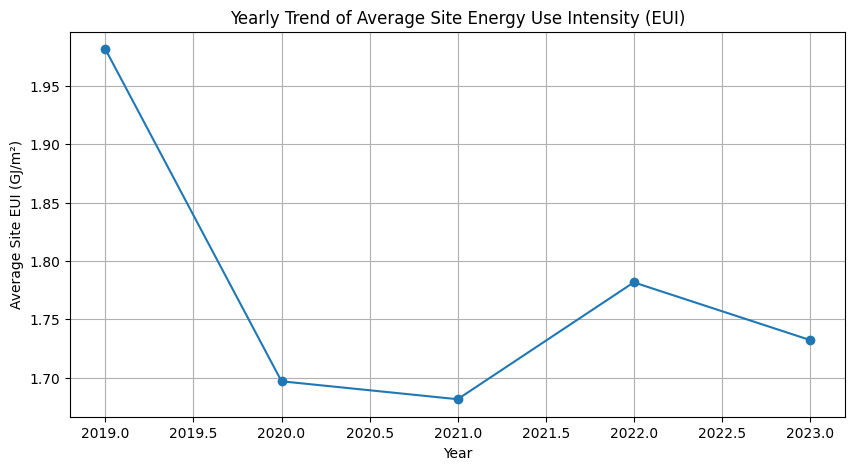

In [46]:
# Yearly trend of average Site Energy Use Intensity (EUI)
plt.figure(figsize=(10, 5))
data_cleaned.groupby("Year Ending")["Site EUI (GJ/m²)"].mean().plot(marker="o")
plt.title("Yearly Trend of Average Site Energy Use Intensity (EUI)")
plt.xlabel("Year")
plt.ylabel("Average Site EUI (GJ/m²)")
plt.grid(True)
plt.show()

My observation is that there is a significant decrease in Energy usage Intensity from approximately 2.00 (G/m²) in 2019 to 1.70 (G/m²) in 2020.
It also shows steady decline to lowest in 2021, which was slightly below 1.70 (G/m²), with no significant increase.

3.2 Comparative Bar Charts

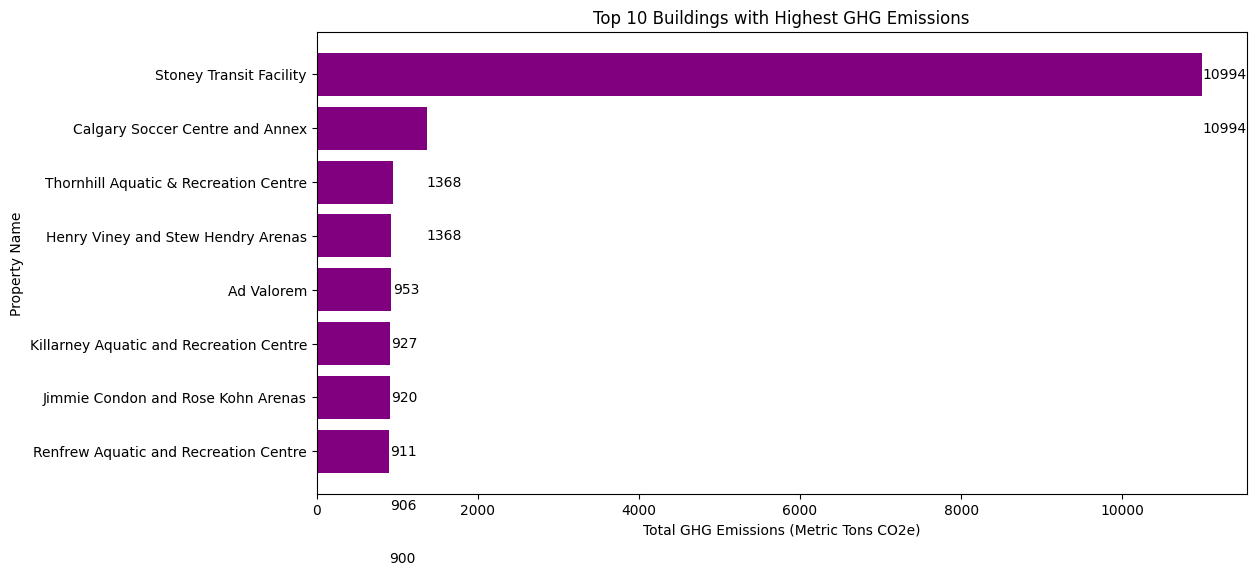

In [62]:
# Top 10 buildings with the highest GHG emissions
top_ghg_emitters = data_cleaned.nlargest(10, "Total GHG Emissions (Metric Tons CO2e)")

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(top_ghg_emitters["Property Name"], top_ghg_emitters["Total GHG Emissions (Metric Tons CO2e)"], color="purple")

# Add labels and title
plt.xlabel("Total GHG Emissions (Metric Tons CO2e)")
plt.ylabel("Property Name")
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest emitter on top

# Annotate bars with emission values
for index, value in enumerate(top_ghg_emitters["Total GHG Emissions (Metric Tons CO2e)"]):
    plt.text(value, index, f"{value:.0f}", va="center", fontsize=10, color="black")

# Show plot
plt.show()


3.3 Heatmap Visualization

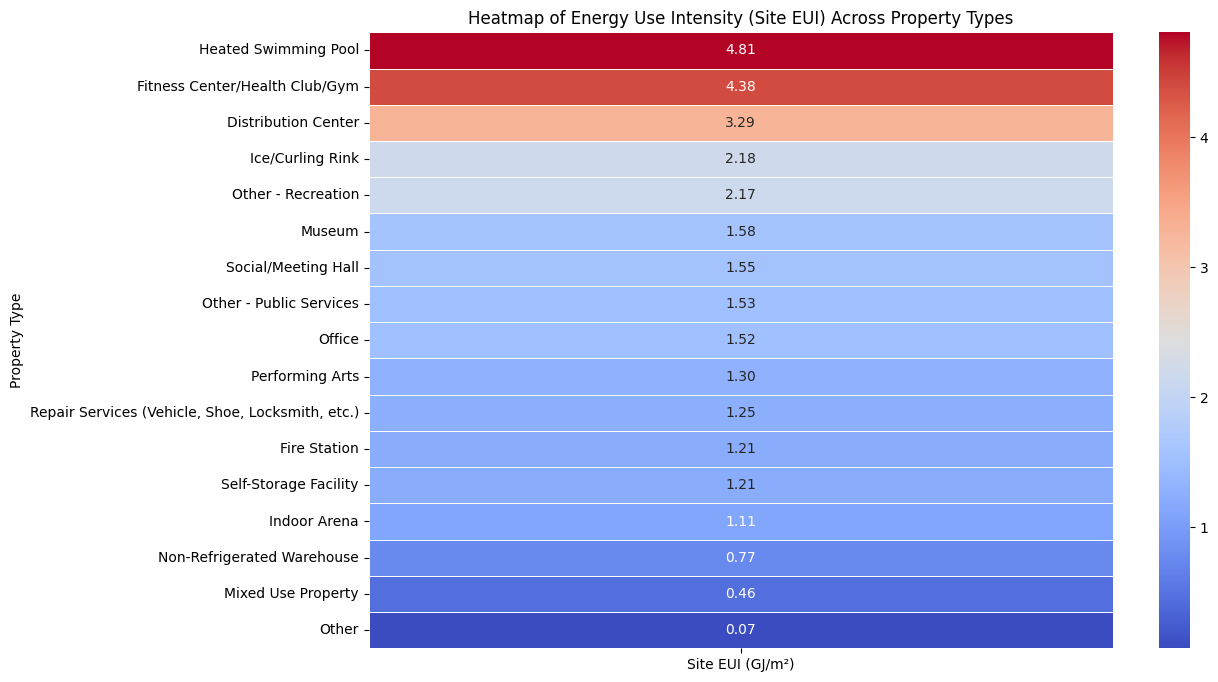

In [66]:
# Create a heatmap of energy usage intensity (Site EUI) across different property types
plt.figure(figsize=(12, 8))
property_type_eui = data_cleaned.pivot_table(values="Site EUI (GJ/m²)", index="Primary Property Type - Self Selected", aggfunc="mean").sort_values(by="Site EUI (GJ/m²)", ascending=False)
sns.heatmap(property_type_eui, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Energy Use Intensity (Site EUI) Across Property Types")
plt.xlabel("")
plt.ylabel("Property Type")
plt.show()

**PART 4: FURTHER ANALYSIS**

4.1 Correlation Testing

In [79]:
# Correct incorrect numeric values using Regex
def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r"[\d,]+\.?\d*", value)
        if match:
            return float(match.group().replace(",", ""))
    return value

# Apply the function to the relevant columns
for col in ["Property GFA - Self-Reported (m²)", "Site Energy Use (GJ)", "Total GHG Emissions (Metric Tons CO2e)"]:
    data_cleaned[col] = data_cleaned[col].apply(extract_numeric).astype(float)

# Compute the correlation matrix
correlation_matrix = data_cleaned[[
    "Property GFA - Self-Reported (m²)",
    "Site Energy Use (GJ)",
    "Total GHG Emissions (Metric Tons CO2e)"
]].corr()

# Display correlation matrix
print("Correlation Matrix")
print(" ")
print(correlation_matrix)

Correlation Matrix
 
                                        Property GFA - Self-Reported (m²)  \
Property GFA - Self-Reported (m²)                                1.000000   
Site Energy Use (GJ)                                             0.702301   
Total GHG Emissions (Metric Tons CO2e)                           0.456561   

                                        Site Energy Use (GJ)  \
Property GFA - Self-Reported (m²)                   0.702301   
Site Energy Use (GJ)                                1.000000   
Total GHG Emissions (Metric Tons CO2e)              0.861644   

                                        Total GHG Emissions (Metric Tons CO2e)  
Property GFA - Self-Reported (m²)                                     0.456561  
Site Energy Use (GJ)                                                  0.861644  
Total GHG Emissions (Metric Tons CO2e)                                1.000000  


KEY OBSERVATIONS & IMPLICATIONS

1. Positive correlation between Property GFA vs Site Energy use, larger buildings tend to consume more enrgy.
2. Correlation between Site Energy use vs Total GHG Emmissions, higher energy consumption leads to higher GHG emmisions.
3. Reducing Energy use is the best way to cut emmisions.

4.2 Hypothesis Testing

In [77]:
# Conduct a t-test comparing the Energy Star Score between Offices and Residential Buildings
# Check if Energy Star Score is in the data.columns
if "ENERGY STAR Score" in data_cleaned.columns:
    office_scores = data_cleaned[data_cleaned["Primary Property Type - Self Selected"] == "Office"]["ENERGY STAR Score"].dropna()
    residential_scores = data_cleaned[data_cleaned["Primary Property Type - Self Selected"] == "Multifamily Housing"]["ENERGY STAR Score"].dropna()
else:
    print(f"Column 'ENERGY STAR Score' not found. Available columns: {data_cleaned.columns.tolist()}")
    # Exit or handle the error appropriately (e.g., skip this section)

# If the column exists, proceed with the t-test
if "ENERGY STAR Score" in data_cleaned.columns:
    !pip install scipy
    import scipy.stats as stats
    # Perform independent t-test
    t_stat, p_value = stats.ttest_ind(office_scores, residential_scores, nan_policy='omit')

    # Display results
    print("T-Test Results:")
    print(f"T-Statistic: {t_stat:.3f}")
    print(f"P-Value: {p_value:.3f}")

Column 'ENERGY STAR Score' not found. Available columns: ['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code', 'Province', 'Primary Property Type - Self Selected', 'Number of Buildings', 'Year Built', 'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)', 'Total GHG Emissions (Metric Tons CO2e)', 'Total GHG Emissions Intensity (kgCO2e/m²)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions Intensity (kgCO2e/m²)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)', 'Year Ending', 'Unique ID']


Energy Star Score is not among the available Columns, therefore it cannot be represented.